# Sliding Window Analysis

In the previous notebooks we calculated the phase synchrony among different ROIs. Now we will use the sliding window approach to calculate the correlation between two regions.

In [1]:
# Import necessary library
import os
from scipy.stats.stats import pearsonr
import scipy.signal

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

## Load the extracted ROIs

In [2]:
# load the preprocessed extraced ROIs for one subject
extracted_rois_path = os.path.join(os.sep, 'home', 'jdafflon', 'code', 'msc_project', 'patrycja', 'data_out',
                                   'preprocessing_out', 'extract_rois', 'filtered', '100307', 'rois_timeseries.txt')

extracted_rois = np.genfromtxt(extracted_rois_path, delimiter=',')

data_out_dir = os.path.join(os.sep, 'home', 'jdafflon', 'code', 'msc_project', 'patrycja', 'data_out')

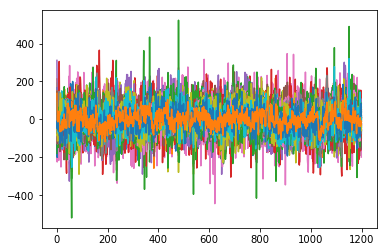

In [3]:
# get overview of signal
for i in range(extracted_rois.shape[0]):
    plt.plot(extracted_rois[i,:])

In [4]:
new = scipy.signal.detrend(extracted_rois)
extracted_rois = new

## Sliding Window

Calculate optimal sliding window. This should take into account the slowest frequency we are interested in analysing.

In [5]:
# Calculate the optimal size of the sliding window.
print(extracted_rois.shape)

min_frequency = 0.01
TR = 0.72
window_size = 20
#window_size = int((1/TR)/(min_frequency))
print window_size

(82, 1200)
20


# Calculate Pearson's Correlation for each window

<img src="images/sliding_window.png" alt="Sliding Window" style="width: 300px;"/>

*Figure: Illustration of the sliding window method with the Pearson's Correlation. The extracted BOLD signal (in grey) for the different regions is used to calculate the pairwise pearson correlation for each window. The process is repeated for the entire duration of the signal*

Your aim here is to calculate the Pearson's correlation among each pair of region inside each sliding window (The Figure above should illustrate the idea). To do this you should:

1) select the time series for each ROIs and calculated the Pearson's correlation for each pair or region 

2) then slide down your window for one time point and repeat the calculations

This process should be repeated until you reach the end of the time serie



In [26]:
subjects = 100307
nregions = extracted_rois.shape[0]
ntpoints = extracted_rois.shape[1]

The next two cells use different methods to analyse the sliding window. The first one stops at ntpoints - windowsize, whereas the second method continues to calculate the correlation for all time points, always decreasing the window size by one. The advantage of the second method is that even if we use different window sizes all time series will have the same lenght.

In [ ]:
# option where last points are cutted out
pearcorrcoeff = np.zeros((nregions, nregions, ntpoints - window_size))
for t in range(0, ntpoints -  window_size):
    for region_a in range(0, nregions - 1):
        roi_a = extracted_rois[region_a, t : window_size + t]
        for region_b in range(region_a + 1, nregions):
            roi_b = extracted_rois[region_b, t : window_size + t]
            pearcorrcoeff[region_a, region_b, t], _ =  pearsonr(roi_a, roi_b)

# get absolute value
pearcorrcoeff = abs(pearcorrcoeff)
            

In [27]:
# option where all time points are taken into account
pearcorrcoeff2 = np.zeros((nregions, nregions, ntpoints))
for jj in range(0, ntpoints):
    start = jj
    end = min(jj + window_size, ntpoints)
    for region_a in range(0, nregions - 1):
        roi_a = extracted_rois[region_a, start:end]
        for region_b in range(region_a + 1, nregions):
            roi_b = extracted_rois[region_b, start:end]
            pearcorrcoeff2[region_a, region_b, jj], _ = pearsonr(roi_a, roi_b)

# get absolute value
pearcorrcoeff2 = abs(pearcorrcoeff2)
        
        

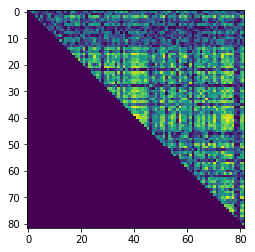

In [28]:
plt.imshow(pearcorrcoeff2[:,:, 0])

In [25]:
# save results
save_path = os.path.join(data_out_dir, 'sliding_window', 'filtered', str(subjects))
if not os.path.exists(save_path):
    os.makedirs(save_path)
pickle.dump(pearcorrcoeff2, open(os.path.join(save_path, "sliding_window.pickle"), "wb"))


Visualise the current correlation coefficient for one specific time point. Is there anything missing? If yes, how can you correct for it?

In [ ]:
plt.imshow(pearcorrcoeff[:,:,23])

In [ ]:
# mirror array
for t in range(ntpoints - window_size):
    pearcorrcoeff[:,:,t] = pearcorrcoeff[:,:,t] + np.transpose(pearcorrcoeff[:,:,t]) - \
    np.diag(pearcorrcoeff[:,:,t].diagonal())

In [ ]:
# visualise full array

# turn interactive plotting off
plt.ioff()
#plt.clim(-1, 1)
#plt.colorbar();
for t in range(ntpoints - window_size):
    plt.imshow(pearcorrcoeff[:,:,t])
    plt.savefig('/home/jdafflon/code/msc_project/patrycja/data_out/sliding_window/sw_t%d.png' %t)

In [ ]:
# get absolute value of the correlation
abs_pearcorrcoeff = abs(pearcorrcoeff)